# **Codigo Capitulo 10**

# **Entrenamiento de modelo con imagenes de Webots**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import os


c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
image_data = pd.read_csv('image_data.csv')
print(image_data.shape)
print(image_data['Image Name'].nunique())
image_data['image_path'] = './train_images/' + image_data['Image Name']
image_paths_wb = image_data['image_path'].values
steerings_wb = image_data['Angle'].values
image_data.head()

(24371, 3)
24371


,Image Name,Angle,Wheel angle,image_path
0,2024-06-21 14-30-28-938071.png,0.0,0,./train_images/2024-06-21 14-30-28-938071.png
1,2024-06-21 14-30-29-300161.png,0.0,0,./train_images/2024-06-21 14-30-29-300161.png
2,2024-06-21 14-30-29-342209.png,0.0,0,./train_images/2024-06-21 14-30-29-342209.png
3,2024-06-21 14-30-29-384020.png,0.0,0,./train_images/2024-06-21 14-30-29-384020.png
4,2024-06-21 14-30-29-424765.png,0.0,0,./train_images/2024-06-21 14-30-29-424765.png


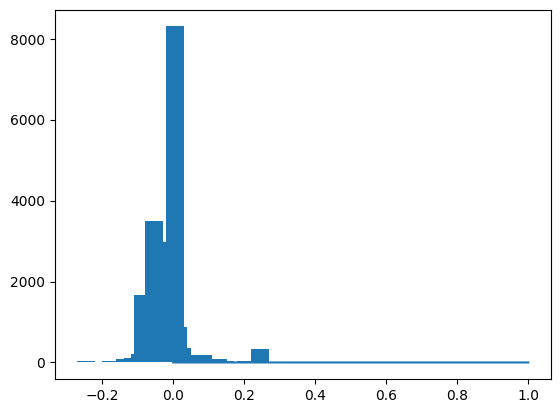

In [3]:
num_bins = 50
hist, bins = np.histogram(image_data['Angle'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(image_data['Angle']), np.max(image_data['Angle'])))

In [4]:
angle_zero_df = image_data[image_data['Angle'] == 0.0]

# Seleccionar aleatoriamente el 40% de los registros con ángulo 0 para conservar
keep_df = angle_zero_df.sample(frac=0.4, random_state=1)

# Filtrar los registros con ángulo distinto de 0
non_zero_df = image_data[image_data['Angle'] != 0.0]

# Combinar los registros a conservar con los registros con ángulo distinto de 0
result_df = pd.concat([keep_df, non_zero_df])

In [5]:
image_data = result_df

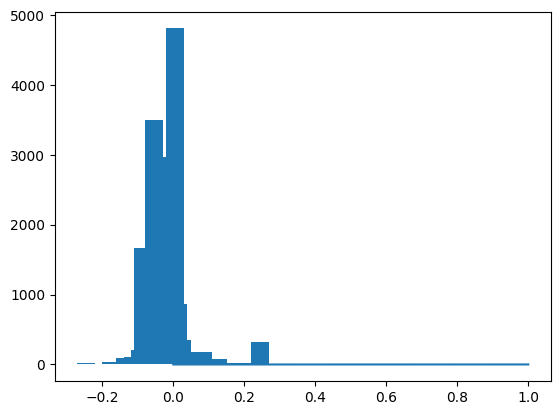

In [6]:
num_bins = 50
hist, bins = np.histogram(image_data['Angle'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(image_data['Angle']), np.max(image_data['Angle'])))

In [7]:
image_paths_wb = image_data['image_path'].values
steerings_wb = image_data['Angle'].values
print(image_paths_wb.shape)
print(steerings_wb.shape )

(20881,)
(20881,)


In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths_wb, steerings_wb, test_size=0.2, random_state=6, shuffle=True)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 16704
Valid Samples: 4177


Text(0.5, 1.0, 'Validation set')

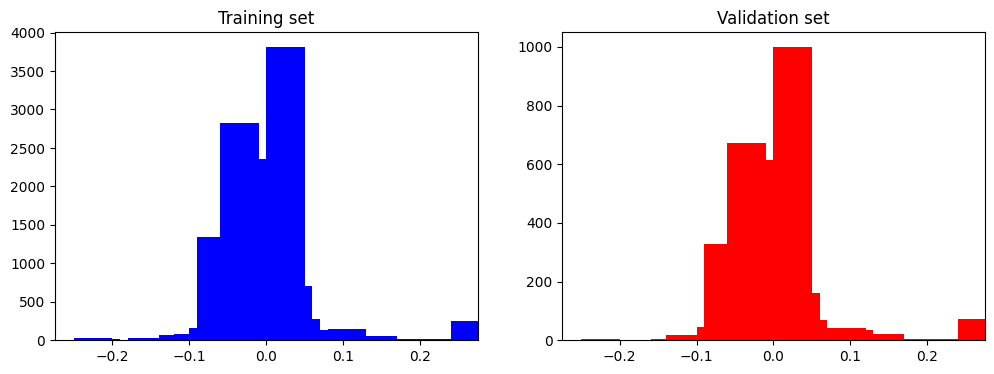

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [10]:

def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = - steering_angle
    return image, steering_angle


def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

# def img_preprocess(img):
#     img = img[60:135,:,:]
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
#     img = cv2.GaussianBlur(img, (3, 3), 0)
#     img = cv2.resize(img, (200, 66))
#     img = img/255
#     return img

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.0')

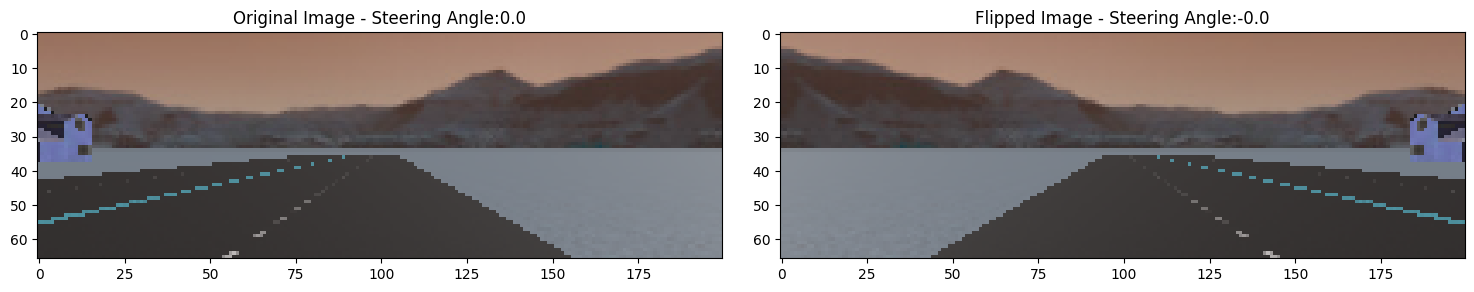

In [11]:
random_index = random.randint(0, 1000)
image = image_paths_wb[random_index]
steering_angle = steerings_wb[random_index]


original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

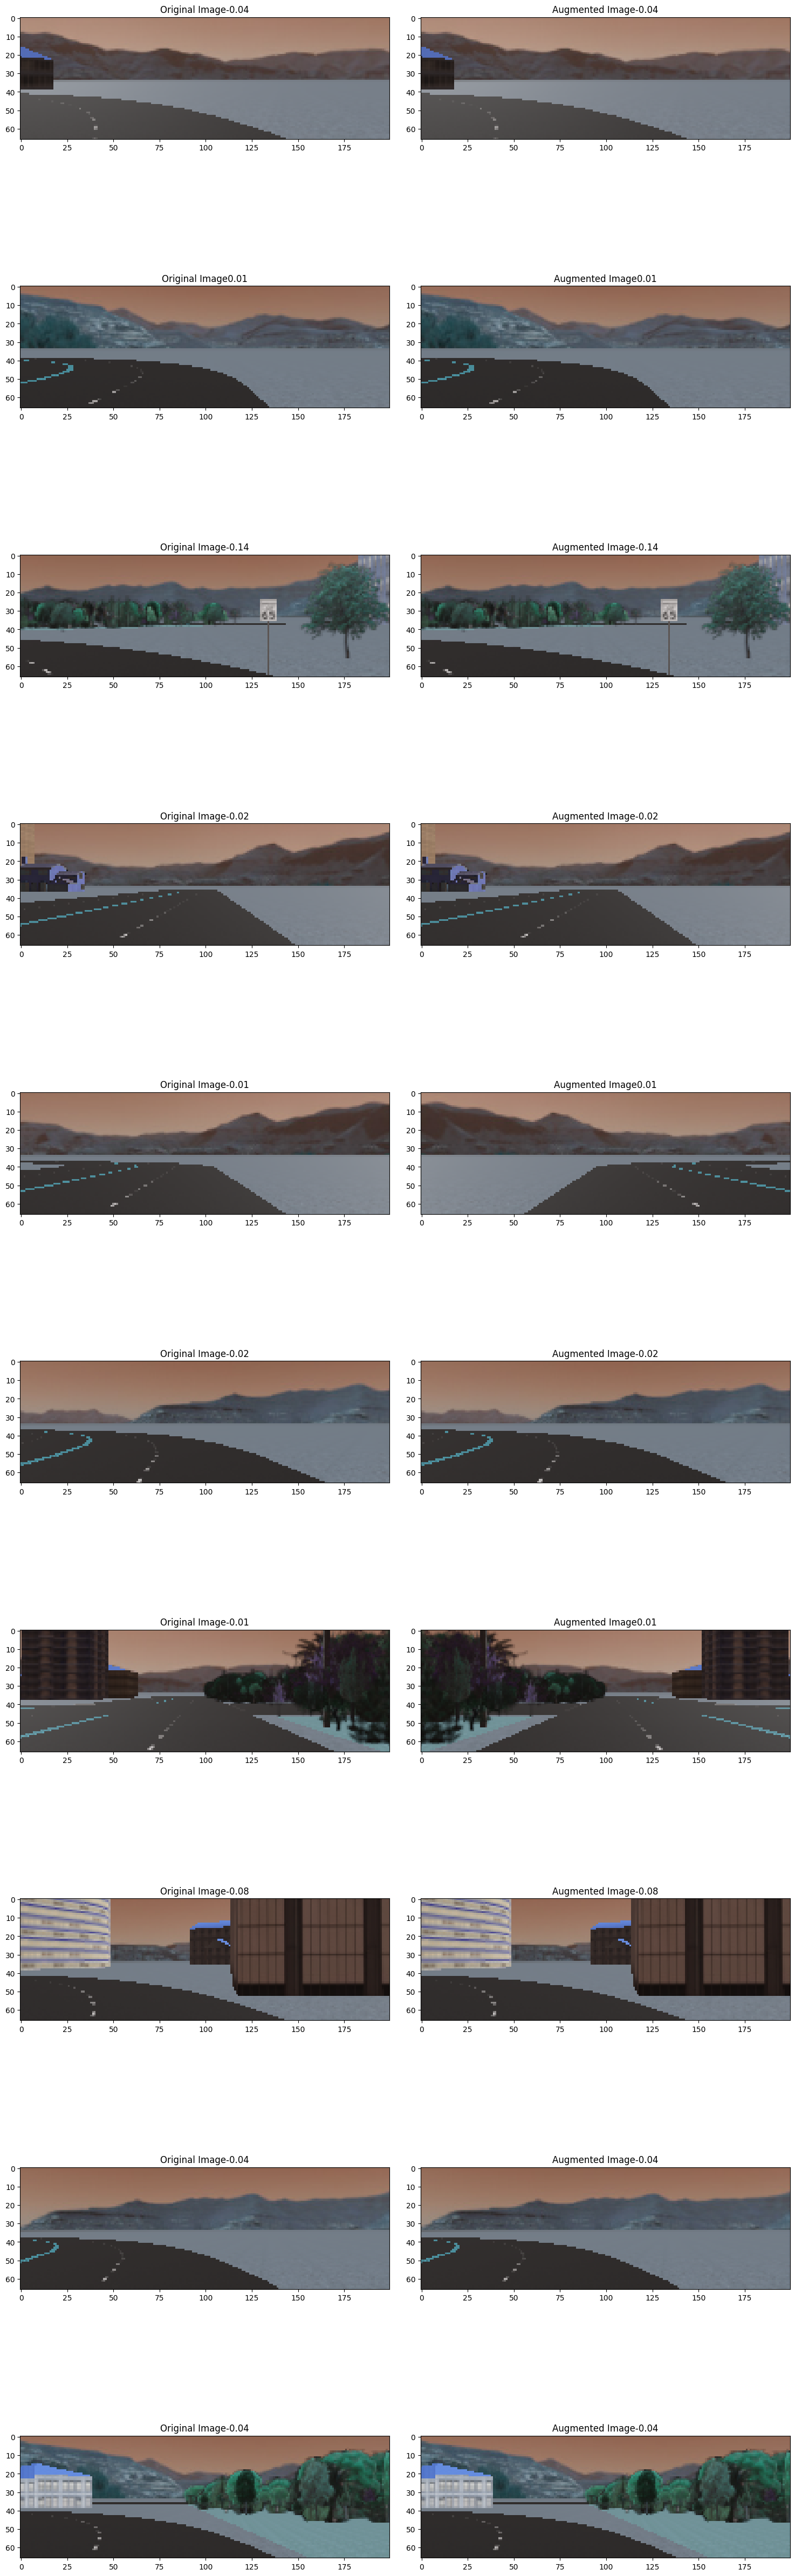

In [12]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
    randnum = random.randint(0, len(image_paths_wb) - 1)
    random_image = image_paths_wb[randnum]
    random_steering = steerings_wb[randnum]

    original_image = mpimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)

    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original Image" + str(random_steering))

    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Augmented Image" + str(steering))

In [13]:
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# import imageio.v3 as iio

# def img_preprocess_webots(img):
#     # print(f"Original shape: {img.shape}")

#     img = img[30:135, :, :]
#     # print(f"After cropping: {img.shape}")

#     img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
#     # print(f"After color conversion: min={img.min()}, max={img.max()}")

#     img = cv2.GaussianBlur(img, (3, 3), 0)
#     # print(f"After Gaussian blur: min={img.min()}, max={img.max()}")

#     img = cv2.resize(img, (200, 66))

#     # print(f"After resizing: min={img.min()}, max={img.max()}")

#     img = img.astype(np.float32)
#     img = (img - img.min()) / (img.max() - img.min())  # Normalización manual
#     # print(f"After manual normalization: min={img.min()}, max={img.max()}")

#     return img

In [14]:
# image = image_paths_wb[100]
# original_image = mpimg.imread(image)
# preprocessed_image = img_preprocess(original_image)

# fig, axs = plt.subplots(1, 2, figsize=(15, 10))
# fig.tight_layout()
# axs[0].imshow(original_image)
# axs[0].set_title('Original Image')
# axs[1].imshow(preprocessed_image)
# axs[1].set_title('Preprocessed Image')

In [15]:
# image = image_paths_wb[100]
# original_image = mpimg.imread(image)
# preprocessed_image = img_preprocess_webots(original_image)

# fig, axs = plt.subplots(1, 2, figsize=(15, 10))
# fig.tight_layout()
# axs[0].imshow(original_image)
# axs[0].set_title('Original Image')
# axs[1].imshow(preprocessed_image)
# axs[1].set_title('Preprocessed Image')

In [16]:
#preprocessed_image.shape

In [17]:
def batch_generator_wb(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)

            if istraining:
                im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
            else:
                im = mpimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]

            # im = img_preprocess_webots(im)
            # print(im.shape)

            batch_img.append(im)
            batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

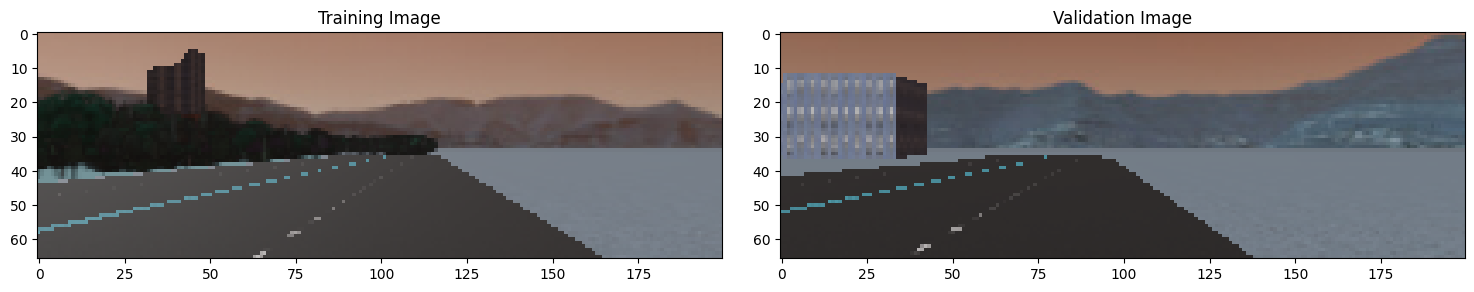

In [18]:
x_train_gen, y_train_gen = next(batch_generator_wb(X_train, y_train, 1, True))
x_valid_gen, y_valid_gen = next(batch_generator_wb(X_valid, y_valid, 1, False))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 4), activation='elu'))
model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(Flatten())
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))

optimizer = Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer)

c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 98, 24)     │         2,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,819 (987.57 KB)

 Trainable params: 252,819 (987.57 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorea la pérdida de validación
    patience=5,          # Número de épocas de paciencia
    restore_best_weights=True  # Restaura los pesos del modelo a la mejor época
)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_valid_scaled = scaler.transform(y_valid.reshape(-1, 1))

In [23]:
mpimg.imread(X_train[0]).shape

(66, 200, 4)

In [24]:
history = model.fit(batch_generator_wb(X_train, y_train_scaled, int(len(y_train_scaled)/5), False),
                              steps_per_epoch=10,
                              epochs=20,
                              validation_data=batch_generator_wb(X_valid, y_valid_scaled, int(len(y_valid_scaled)/2), False),
                              validation_steps=5,
                              verbose=1,
                              shuffle = 1,
                    callbacks=[early_stopping])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 0.8101 - val_loss: 0.0231
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - loss: 0.0270 - val_loss: 0.0257
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - loss: 0.0221 - val_loss: 0.0128
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - loss: 0.0135 - val_loss: 0.0122
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - loss: 0.0119 - val_loss: 0.0113
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - loss: 0.0105 - val_loss: 0.0110
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - loss: 0.0100 - val_loss: 0.0088
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - loss: 0.0086 - val_loss: 0.0084
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - loss: 0.0086 - val_loss: 0.0085
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - loss: 0.0085 - val_loss: 0.0084
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - loss: 0.0081 - val_loss: 0.0076
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - loss: 0.0078 - val_lo

Text(0.5, 0, 'Epoch')

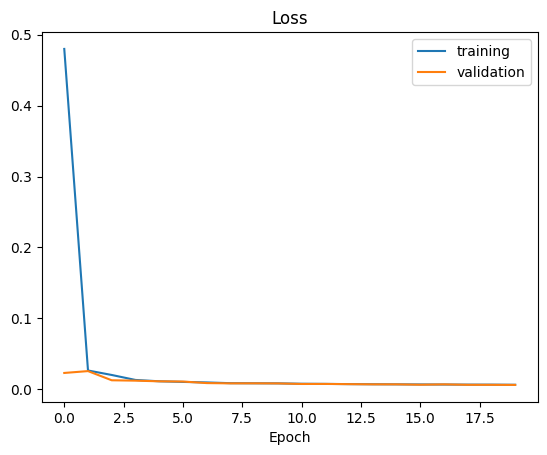

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [26]:
model.save('model_project_without_preprocessing.h5')

In [27]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [28]:
X_train[0]

'./train_images/2024-06-21 14-42-03-883127.png'

In [29]:
image = mpimg.imread(r'./train_images\2024-06-21 14-30-28-938071.png')

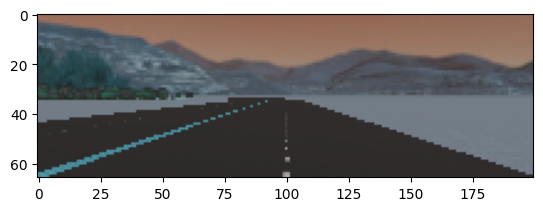

In [30]:
plt.imshow(image)

In [31]:
predicted_angle = model.predict(np.expand_dims(image, axis=0))
predicted_angle

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[0.59979147]], dtype=float32)

In [32]:
predicted_angle_1 = scaler.inverse_transform(predicted_angle)
predicted_angle_1

array([[0.04989573]], dtype=float32)

In [33]:
from PIL import Image
# Cargar la imagen desde el disco
image_pil = Image.open(r'./train_images\2024-06-21 14-30-28-938071.png')

# Convertir la imagen a un arreglo NumPy
image_np = np.array(image_pil)

In [34]:
image_np.shape

(66, 200, 4)

In [35]:
predicted_angle = model.predict(np.expand_dims(image_np/255, axis=0))
predicted_angle

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.59979147]], dtype=float32)

In [36]:
predicted_angle_1 = scaler.inverse_transform(predicted_angle)
predicted_angle_1

array([[0.04989573]], dtype=float32)